In [179]:
import pandas as pd
import numpy as np
import plotly.express as px
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
!pip install lightgbm
!pip install xgboost

In [181]:
import re
from string import punctuation
import contractions
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk #3.8.1
nltk.download('punkt')
nltk.download("wordnet")
nltk.download('stopwords')
from wordcloud import WordCloud
import glob
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thavaseelan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thavaseelan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thavaseelan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [182]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score,recall_score,precision_score,accuracy_score, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [184]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [185]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#import lightgbm as lgbm
#import xgboost as xgboost
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter = 100, multi_class = "multinomial")

In [188]:
import urllib.request
import zipfile
import os

In [189]:
# URL of the zip file
url = 'https://github.com/ThavaseelanMohan/AIMLTraining/raw/main/Intensity_data.zip'

# Define the filename for the downloaded zip file
zip_filename = 'Intensity_data.zip'

# Define the directory where the files will be extracted
extracted_dir = 'Intensity_data'

In [190]:
# Download the zip file
urllib.request.urlretrieve(url, zip_filename)
print("Downloaded successfully.")

Downloaded successfully.


In [191]:
# Extract the contents of the zip file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
print("Extracted successfully.")

Extracted successfully.


In [192]:
# Delete the zip file
os.remove(zip_filename)
print("Zip file deleted.")

Zip file deleted.


In [193]:
#List all the csv files
def myfunction(Intensity_data_files):
  print(Intensity_data_files)
file_path = '/Users/thavaseelan/Project/Intensity_data'

for file in os.listdir(file_path):
  if file.endswith(".csv"):
    myfunction(file)

sadness.csv
happiness.csv
angriness.csv


In [194]:
df = pd.concat(map(pd.read_csv, glob.glob('/Users/thavaseelan/Project/Intensity_data/*.csv')))

In [195]:
print(df)

                                               content  intensity
0    Never hurt people who love you a lot, because ...    sadness
1    Don’t expect me to tell you what you did wrong...    sadness
2    I preferred walking away than fighting for you...    sadness
3    Moving forward in life isn’t the hard part, it...    sadness
4    Never cry for anyone in your life, because tho...    sadness
..                                                 ...        ...
691             Is getting close to just walking away?  angriness
692  Did you ever just want to slap the stupid out ...  angriness
693  Is singing, if you’re angry & you know it punc...  angriness
694  Telling someone to calm down just makes them s...  angriness
695  Your mistake is letting me go, my mistake was ...  angriness

[2039 rows x 2 columns]


In [196]:
df.shape

(2039, 2)

In [197]:
df.columns

Index(['content', 'intensity'], dtype='object')

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2039 entries, 0 to 695
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    2039 non-null   object
 1   intensity  2039 non-null   object
dtypes: object(2)
memory usage: 47.8+ KB


In [199]:
df.describe()

content  intensity
count                                                2039       2039
unique                                               1586          3
top     ['You Hurt Me But I Still Love You.', 'True Lo...  happiness
freq                                                  134        708

In [200]:
#Finding duplicates
df.duplicated().sum()

447

In [201]:
df['intensity'].unique()

array(['sadness', 'happiness', 'angriness'], dtype=object)

<Axes: xlabel='count', ylabel='intensity'>

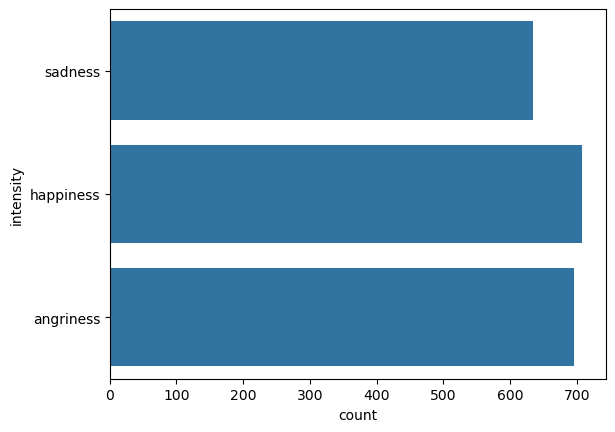

In [202]:
sns.countplot(df['intensity'])

In [203]:
# Finding null values
df.isnull().sum()

content      0
intensity    0
dtype: int64

In [204]:
df[df['intensity']=='angriness']

content  intensity
0    Sometimes I’m not angry, I’m hurt and there’s ...  angriness
1                       Not available for busy people☺  angriness
2    I do not exist to impress the world. I exist t...  angriness
3    Everything is getting expensive except some pe...  angriness
4         My phone screen is brighter than my future 🙁  angriness
..                                                 ...        ...
691             Is getting close to just walking away?  angriness
692  Did you ever just want to slap the stupid out ...  angriness
693  Is singing, if you’re angry & you know it punc...  angriness
694  Telling someone to calm down just makes them s...  angriness
695  Your mistake is letting me go, my mistake was ...  angriness

[696 rows x 2 columns]

In [205]:
df[df['intensity']=='happiness']

content  intensity
0    Wants to know how the hell I can remember word...  happiness
1    Love is a long sweet dream & marriage is an al...  happiness
2    The world could be amazing when you are slight...  happiness
3    My secret talent is getting tired without doin...  happiness
4    Khatarnaak Whatsapp Status Ever… Can\’t talk, ...  happiness
..                                                 ...        ...
703      If I know what love is, it is because of you.  happiness
704  The spaces between your fingers are meant to b...  happiness
705  In you i H've Found the love of my life and my...  happiness
706  The magic of first love is our ignorance that ...  happiness
707      Love can't be found Where it doesn't exist ..  happiness

[708 rows x 2 columns]

In [206]:
df[df['intensity']=='sadness']

content intensity
0    Never hurt people who love you a lot, because ...   sadness
1    Don’t expect me to tell you what you did wrong...   sadness
2    I preferred walking away than fighting for you...   sadness
3    Moving forward in life isn’t the hard part, it...   sadness
4    Never cry for anyone in your life, because tho...   sadness
..                                                 ...       ...
630  Stop crying over yesterday and start smiling f...   sadness
631  An Eye with Dust ‘n A Heart with Trust Always ...   sadness
632  Tears come from the heart and not from the brain.   sadness
633  Sometimes you have to hold your head up high, ...   sadness
634  Instead of wiping your tears, wipe away the pe...   sadness

[635 rows x 2 columns]

In [207]:
df[df['intensity']=='angriness'].duplicated().sum()

198

In [208]:
df[df['intensity']=='happiness'].duplicated().sum()

4

In [209]:
df[df['intensity']=='sadness'].duplicated().sum()

245

intensity
happiness    708
angriness    696
sadness      635
Name: count, dtype: int64


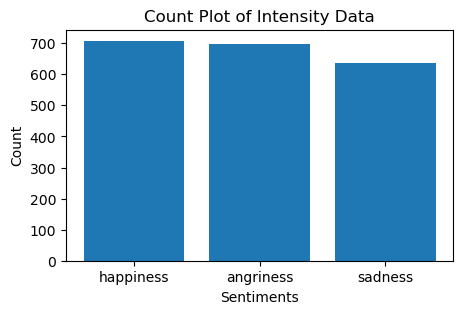

In [210]:
sentiment_count = df['intensity'].value_counts()
print(sentiment_count)
plt.figure(figsize=(5, 3))
plt.bar(sentiment_count.index, sentiment_count)
plt.title('Count Plot of Intensity Data')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

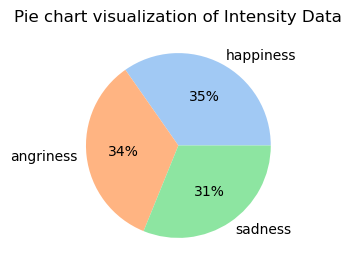

In [211]:
#Define plot size
plt.figure(figsize=[3,3])

#Define column to use
data = df["intensity"].value_counts(normalize=True)

#Define labels
labels = ["happiness","angriness","sadness"]

#Define color palette
colors = sns.color_palette('pastel')

#Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Pie chart visualization of Intensity Data")
plt.show()

In [212]:
df = df.drop_duplicates().reset_index(drop=True)

In [213]:
df

content  intensity
0     Never hurt people who love you a lot, because ...    sadness
1     Don’t expect me to tell you what you did wrong...    sadness
2     I preferred walking away than fighting for you...    sadness
3     Moving forward in life isn’t the hard part, it...    sadness
4     Never cry for anyone in your life, because tho...    sadness
...                                                 ...        ...
1587  The embarrassment after the anger is the bigge...  angriness
1588  The strong man is not the good wrestler; the s...  angriness
1589  A man is about as big as the things that make ...  angriness
1590  Is singing, if you’re angry & you know it punc...  angriness
1591  Telling someone to calm down just makes them s...  angriness

[1592 rows x 2 columns]

In [214]:
df.shape

(1592, 2)

In [215]:
df.describe()

content  intensity
count                                                1592       1592
unique                                               1586          3
top     There is no excuse for cheating in a relations...  happiness
freq                                                    2        704

In [216]:
df[df['intensity']=='angriness'].duplicated().sum()

0

In [217]:
df[df['intensity']=='happiness'].duplicated().sum()

0

In [218]:
df[df['intensity']=='sadness'].duplicated().sum()

0

intensity
happiness    704
angriness    498
sadness      390
Name: count, dtype: int64


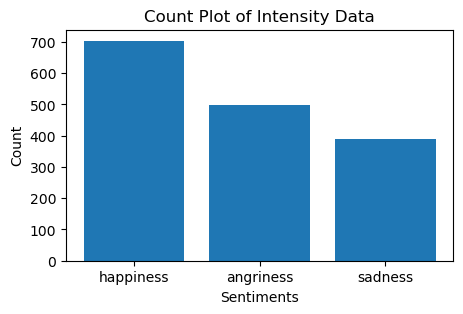

In [219]:
sentiment_count = df['intensity'].value_counts()
print(sentiment_count)
plt.figure(figsize=(5, 3))
plt.bar(sentiment_count.index, sentiment_count)
plt.title('Count Plot of Intensity Data')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

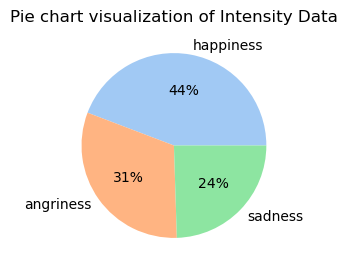

In [220]:
#Define plot size
plt.figure(figsize=[3,3])

#Define column to use
data = df["intensity"].value_counts(normalize=True)

#Define labels
labels = ["happiness","angriness","sadness"]

#Define color palette
colors = sns.color_palette('pastel')

#Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Pie chart visualization of Intensity Data")
plt.show()

In [221]:
df

content  intensity
0     Never hurt people who love you a lot, because ...    sadness
1     Don’t expect me to tell you what you did wrong...    sadness
2     I preferred walking away than fighting for you...    sadness
3     Moving forward in life isn’t the hard part, it...    sadness
4     Never cry for anyone in your life, because tho...    sadness
...                                                 ...        ...
1587  The embarrassment after the anger is the bigge...  angriness
1588  The strong man is not the good wrestler; the s...  angriness
1589  A man is about as big as the things that make ...  angriness
1590  Is singing, if you’re angry & you know it punc...  angriness
1591  Telling someone to calm down just makes them s...  angriness

[1592 rows x 2 columns]

In [222]:
def clean_text_with_sw(text):
        text = str(text).lower() # converting to lower
        text = " ".join([contractions.fix(expanded_word) for expanded_word in text.split()]) #Removing contractions
        text = re.sub('\[.*?\]', '', text) # Removing text in square brackets
        text = re.sub('https?://\S+|www\.\S+', '', text) #Removing links
        text = re.sub('[^a-zA-Z ]', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(punctuation), '', text) #Removing Punctuations
        text = re.sub('\w*\d\w*', '', text) #Removing words containing numbers
        text = re.sub('\b\w{1,3}\b', '', text) #Any words less than 3 characters are replaced by blanks
        tokenized_text = word_tokenize(str(text)) # Tokenizing text
        filtered_text = [word for word in tokenized_text if word not in stopwords.words('english')] #Removing stopwords
        lemmatization = [lemmatizer.lemmatize(word) for word in filtered_text] #Lemmatization
        lemmatization = ' '.join(lemmatization)
        #lemmatization = ' '.join(words for words in lemmatization.split() if len(words)>2)
        return text

In [223]:
# apply clean text fuction on each contents in the training dataset
df['content_with_sw'] = df['content'].apply(lambda x:clean_text_with_sw(x))

df.head()

content intensity  \
0  Never hurt people who love you a lot, because ...   sadness   
1  Don’t expect me to tell you what you did wrong...   sadness   
2  I preferred walking away than fighting for you...   sadness   
3  Moving forward in life isn’t the hard part, it...   sadness   
4  Never cry for anyone in your life, because tho...   sadness   

                                     content_with_sw  
0  never hurt people who love you a lot because t...  
1  do not expect me to tell you what you did wron...  
2  i preferred walking away than fighting for you...  
3  moving forward in life is not the hard part it...  
4  never cry for anyone in your life because thos...

In [224]:
df['word_list'] = df['content_with_sw'].apply(lambda x:word_tokenize(str(x)))
df.head()

content intensity  \
0  Never hurt people who love you a lot, because ...   sadness   
1  Don’t expect me to tell you what you did wrong...   sadness   
2  I preferred walking away than fighting for you...   sadness   
3  Moving forward in life isn’t the hard part, it...   sadness   
4  Never cry for anyone in your life, because tho...   sadness   

                                     content_with_sw  \
0  never hurt people who love you a lot because t...   
1  do not expect me to tell you what you did wron...   
2  i preferred walking away than fighting for you...   
3  moving forward in life is not the hard part it...   
4  never cry for anyone in your life because thos...   

                                           word_list  
0  [never, hurt, people, who, love, you, a, lot, ...  
1  [do, not, expect, me, to, tell, you, what, you...  
2  [i, preferred, walking, away, than, fighting, ...  
3  [moving, forward, in, life, is, not, the, hard...  
4  [never, cry, for, anyone, in, your, life, beca...

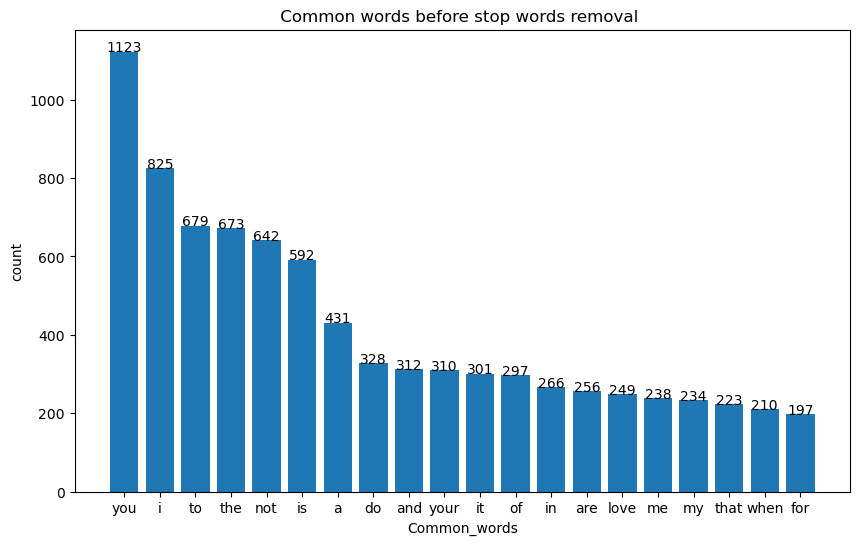

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

In [225]:
top = Counter([item for sublist in df['word_list'] for item in sublist])
temp_df_before_cleansing = pd.DataFrame(top.most_common(20))
temp_df_before_cleansing.columns = ['Common_words','count']
temp_df_before_cleansing.style.background_gradient(cmap = 'Blues')
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
x = temp_df_before_cleansing['Common_words']
y = temp_df_before_cleansing['count']
plt.figure(figsize = (10,6))
plt.title( " Common words before stop words removal  ")
plt.xlabel("Common_words")
plt.ylabel("count")
plt.bar(x,y)
addlabels(x, y)
plt.show()
plt.figure(figsize=(5, 3))

In [226]:
def Final_Cleansed_File(text):
    
  text = str(text).lower() # converting to lower
  text = " ".join([contractions.fix(expanded_word) for expanded_word in text.split()]) #Removing contractions
  text = re.sub('\[.*?\]', '', text) # Removing text in square brackets
  text = re.sub('https?://\S+|www\.\S+', '', text) #Removing links
  text = re.sub('[^a-zA-Z ]', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(punctuation), '', text) #Removing Punctuations
  text = re.sub('\w*\d\w*', '', text) #Removing words containing numbers
  text = re.sub('\b\w{1,3}\b', '', text) #Any words less than 3 characters are replaced by blanks
  text = ' '.join(words for words in text.split() if len(words)>2)
  text = re.sub("than|you|can|the|who|for|anyone|because|those|what|our|where|with|but|will|are|and|when|that|have|just|where|even|hve|man|behind|still|rself|ago|people|around|tell|thing|rself|behind|someone|thought|part|girl|one|sometimes|someone|much|day|think|mean|one","",text)
  tokenized_text = word_tokenize(str(text)) # Tokenizing text
  filtered_text = [word for word in tokenized_text if word not in stopwords.words('english')] #Removing stopwords
  lemmatization = [lemmatizer.lemmatize(word) for word in filtered_text] #Lemmatization
  lemmatization = ' '.join(lemmatization)
  text = re.sub("than|you|can|the|who|for|anyone|because|those|what|our|where|with|but|will|are|and|when|that|have|just|where|even|hve|man|behind|still|rself|ago|people|around|tell|thing|rself|behind|someone|thought|part|girl|one|sometimes|someone|much|day|think|mean|one","",lemmatization)
  text = ' '.join(words for words in lemmatization.split() if len(words)>2)
  return text

In [227]:
# apply clean text fuction on each twitte in the training dataset
df['Final_content'] = df['content'].apply(lambda x:Final_Cleansed_File(x))

df.head()

content intensity  \
0  Never hurt people who love you a lot, because ...   sadness   
1  Don’t expect me to tell you what you did wrong...   sadness   
2  I preferred walking away than fighting for you...   sadness   
3  Moving forward in life isn’t the hard part, it...   sadness   
4  Never cry for anyone in your life, because tho...   sadness   

                                     content_with_sw  \
0  never hurt people who love you a lot because t...   
1  do not expect me to tell you what you did wron...   
2  i preferred walking away than fighting for you...   
3  moving forward in life is not the hard part it...   
4  never cry for anyone in your life because thos...   

                                           word_list  \
0  [never, hurt, people, who, love, you, a, lot, ...   
1  [do, not, expect, me, to, tell, you, what, you...   
2  [i, preferred, walking, away, than, fighting, ...   
3  [moving, forward, in, life, is, not, the, hard...   
4  [never, cry, for, anyone, in, your, life, beca...   

                                       Final_content  
0  never hurt love lot hurt back probably choice ...  
1  expect wrong figure ready correct itcos know m...  
2  preferred walking away fighting worth fighting...  
3            moving ward life hard leaving move ward  
4  never cry life cry deserve tear deserving neve...

In [228]:
df['Final_word_list'] = df['Final_content'].apply(lambda x:word_tokenize(str(x)))
df.head()

content intensity  \
0  Never hurt people who love you a lot, because ...   sadness   
1  Don’t expect me to tell you what you did wrong...   sadness   
2  I preferred walking away than fighting for you...   sadness   
3  Moving forward in life isn’t the hard part, it...   sadness   
4  Never cry for anyone in your life, because tho...   sadness   

                                     content_with_sw  \
0  never hurt people who love you a lot because t...   
1  do not expect me to tell you what you did wron...   
2  i preferred walking away than fighting for you...   
3  moving forward in life is not the hard part it...   
4  never cry for anyone in your life because thos...   

                                           word_list  \
0  [never, hurt, people, who, love, you, a, lot, ...   
1  [do, not, expect, me, to, tell, you, what, you...   
2  [i, preferred, walking, away, than, fighting, ...   
3  [moving, forward, in, life, is, not, the, hard...   
4  [never, cry, for, anyone, in, your, life, beca...   

                                       Final_content  \
0  never hurt love lot hurt back probably choice ...   
1  expect wrong figure ready correct itcos know m...   
2  preferred walking away fighting worth fighting...   
3            moving ward life hard leaving move ward   
4  never cry life cry deserve tear deserving neve...   

                                     Final_word_list  
0  [never, hurt, love, lot, hurt, back, probably,...  
1  [expect, wrong, figure, ready, correct, itcos,...  
2  [preferred, walking, away, fighting, worth, fi...  
3    [moving, ward, life, hard, leaving, move, ward]  
4  [never, cry, life, cry, deserve, tear, deservi...

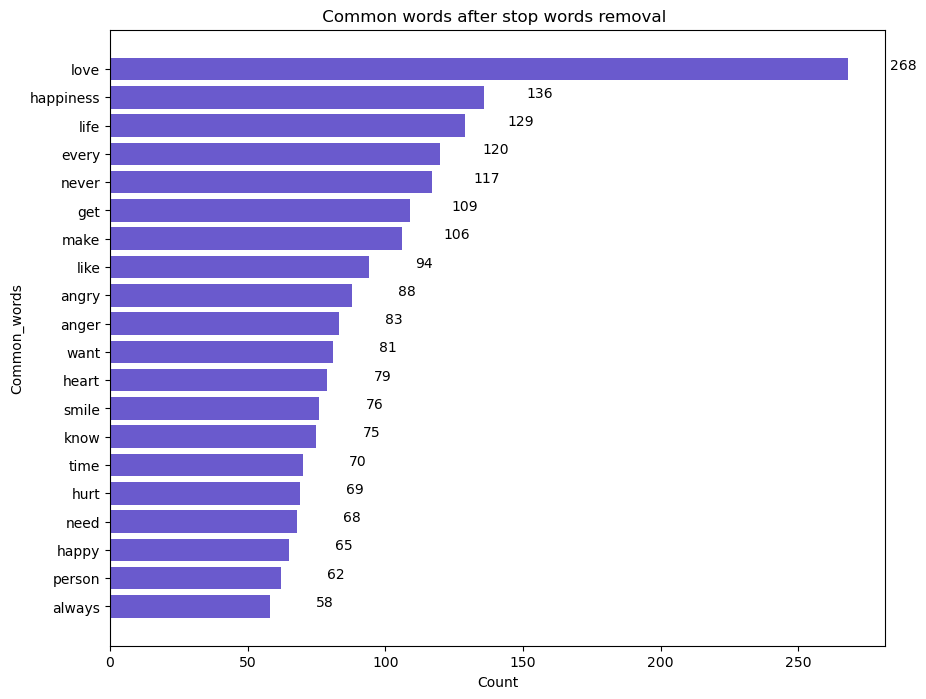

In [229]:
top = Counter([item for sublist in df['Final_word_list'] for item in sublist])
temp_df_after_cleansing = pd.DataFrame(top.most_common(20))
temp_df_after_cleansing.columns = ['Common_words','count']
temp_df_after_cleansing.style.background_gradient(cmap = 'Blues')

x = temp_df_after_cleansing['Common_words']
y = temp_df_after_cleansing['count']
plt.figure(figsize = (10,8))
#indexes = np.arange(len(y))
plt.title( " Common words after stop words removal  ")
plt.xlabel("Count")
plt.ylabel("Common_words")
plt.barh( x,y, color = 'slateblue')
plt.gca().invert_yaxis()
#addlabels(x, y)
for i, v in enumerate(y):
  plt.text(v + 20, i, str(v), ha='center')
plt.show()

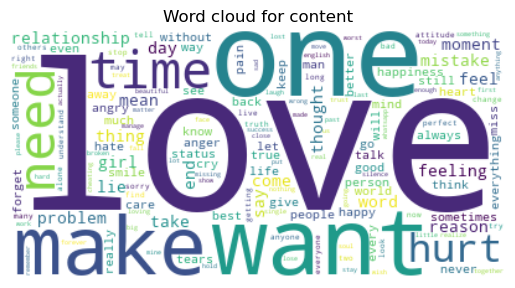

In [230]:
top = Counter([item for sublist in df['word_list'] for item in sublist])
temp_df_before_cleansing = pd.DataFrame(top.most_common(400))
temp_df_before_cleansing.columns = ['Common_words','count']
temp_df_before_cleansing.style.background_gradient(cmap = 'Blues')

wordcloud_text = ','.join(list(temp_df_before_cleansing['Common_words'].values))
wordcloud = WordCloud(background_color="white",max_words=5000, contour_width=3).generate(str(wordcloud_text))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word cloud for content")
plt.axis("off")
plt.show()

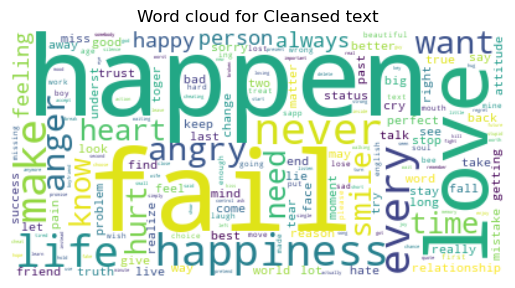

In [231]:
top = Counter([item for sublist in df['Final_word_list'] for item in sublist])
temp_df_after_cleansing = pd.DataFrame(top.most_common(400))
temp_df_after_cleansing.columns = ['Common_words','count']
temp_df_after_cleansing.style.background_gradient(cmap = 'Blues')

wordcloud_text = ','.join(list(temp_df_after_cleansing['Common_words'].values))
wordcloud = WordCloud(background_color="white",max_words=5000, contour_width=3).generate(str(wordcloud_text))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word cloud for Cleansed text")
plt.axis("off")
plt.show()

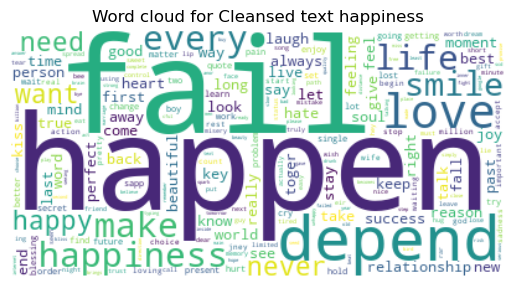

In [232]:
df1 = df[['intensity','Final_word_list']]
df1 = df1[df1['intensity']=='happiness']
top = Counter([item for sublist in df1['Final_word_list'] for item in sublist])
temp_df_after_cleansing = pd.DataFrame(top.most_common(400))
temp_df_after_cleansing.columns = ['Common_words','count']
temp_df_after_cleansing.style.background_gradient(cmap = 'Blues')

wordcloud_text = ','.join(list(temp_df_after_cleansing['Common_words'].values))
wordcloud = WordCloud(background_color="white",max_words=5000, contour_width=3).generate(str(wordcloud_text))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word cloud for Cleansed text happiness")
plt.axis("off")
plt.show()

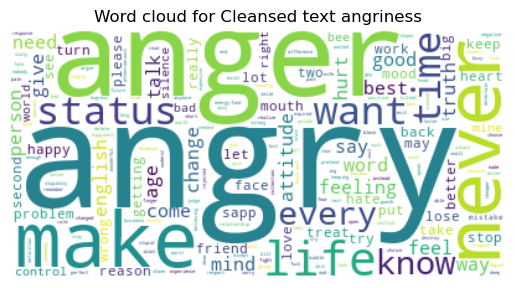

In [233]:
df1 = df[['intensity','Final_word_list']]
df1 = df1[df1['intensity']=='angriness']
top = Counter([item for sublist in df1['Final_word_list'] for item in sublist])
temp_df_after_cleansing = pd.DataFrame(top.most_common(400))
temp_df_after_cleansing.columns = ['Common_words','count']
temp_df_after_cleansing.style.background_gradient(cmap = 'Blues')

wordcloud_text = ','.join(list(temp_df_after_cleansing['Common_words'].values))
wordcloud = WordCloud(background_color="white",max_words=5000, contour_width=3).generate(str(wordcloud_text))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word cloud for Cleansed text angriness")
plt.axis("off")
plt.show()

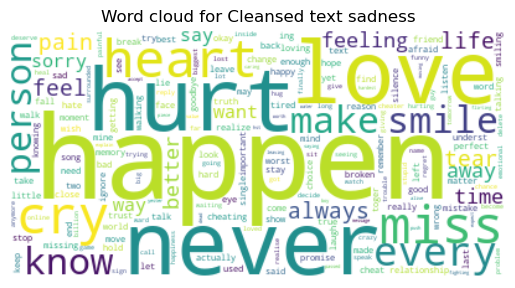

In [234]:
df1 = df[['intensity','Final_word_list']]
df1 = df1[df1['intensity']=='sadness']
top = Counter([item for sublist in df1['Final_word_list'] for item in sublist])
temp_df_after_cleansing = pd.DataFrame(top.most_common(400))
temp_df_after_cleansing.columns = ['Common_words','count']
temp_df_after_cleansing.style.background_gradient(cmap = 'Blues')

wordcloud_text = ','.join(list(temp_df_after_cleansing['Common_words'].values))
wordcloud = WordCloud(background_color="white",max_words=5000, contour_width=3).generate(str(wordcloud_text))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word cloud for Cleansed text sadness")
plt.axis("off")
plt.show()

In [235]:
df

content  intensity  \
0     Never hurt people who love you a lot, because ...    sadness   
1     Don’t expect me to tell you what you did wrong...    sadness   
2     I preferred walking away than fighting for you...    sadness   
3     Moving forward in life isn’t the hard part, it...    sadness   
4     Never cry for anyone in your life, because tho...    sadness   
...                                                 ...        ...   
1587  The embarrassment after the anger is the bigge...  angriness   
1588  The strong man is not the good wrestler; the s...  angriness   
1589  A man is about as big as the things that make ...  angriness   
1590  Is singing, if you’re angry & you know it punc...  angriness   
1591  Telling someone to calm down just makes them s...  angriness   

                                        content_with_sw  \
0     never hurt people who love you a lot because t...   
1     do not expect me to tell you what you did wron...   
2     i preferred walking away than fighting for you...   
3     moving forward in life is not the hard part it...   
4     never cry for anyone in your life because thos...   
...                                                 ...   
1587  the embarrassment after the anger is the bigge...   
1588  the strong man is not the good wrestler the st...   
1589  a man is about as big as the things that make ...   
1590  is singing if you are angry  you know it punch...   
1591  telling someone to calm down just makes them s...   

                                              word_list  \
0     [never, hurt, people, who, love, you, a, lot, ...   
1     [do, not, expect, me, to, tell, you, what, you...   
2     [i, preferred, walking, away, than, fighting, ...   
3     [moving, forward, in, life, is, not, the, hard...   
4     [never, cry, for, anyone, in, your, life, beca...   
...                                                 ...   
1587  [the, embarrassment, after, the, anger, is, th...   
1588  [the, strong, man, is, not, the, good, wrestle...   
1589  [a, man, is, about, as, big, as, the, things, ...   
1590  [is, singing, if, you, are, angry, you, know, ...   
1591  [telling, someone, to, calm, down, just, makes...   

                                          Final_content  \
0     never hurt love lot hurt back probably choice ...   
1     expect wrong figure ready correct itcos know m...   
2     preferred walking away fighting worth fighting...   
3               moving ward life hard leaving move ward   
4     never cry life cry deserve tear deserving neve...   
...                                                 ...   
1587  embarrassment anger biggest humiliation person...   
1588          strong good wrestler strong control angry   
1589                                     big make angry   
1590                      singing angry know punch face   
1591                              ing calm make angrier   

                                        Final_word_list  
0     [never, hurt, love, lot, hurt, back, probably,...  
1     [expect, wrong, figure, ready, correct, itcos,...  
2     [preferred, walking, away, fighting, worth, fi...  
3       [moving, ward, life, hard, leaving, move, ward]  
4     [never, cry, life, cry, deserve, tear, deservi...  
...                                                 ...  
1587  [embarrassment, anger, biggest, humiliation, p...  
1588   [strong, good, wrestler, strong, control, angry]  
1589                                 [big, make, angry]  
1590                [singing, angry, know, punch, face]  
1591                         [ing, calm, make, angrier]  

[1592 rows x 6 columns]

In [236]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['intensity']= label_encoder.fit_transform(df['intensity'])

df['intensity'].unique()

array([2, 1, 0])

In [237]:
dataset = df[['content','Final_content','intensity']]
dataset.columns = ['content','Final_content','intensity']

train_df = df[['Final_content','intensity']]
train_df.columns = ['content', 'intensity']
train_df.head()

content  intensity
0  never hurt love lot hurt back probably choice ...          2
1  expect wrong figure ready correct itcos know m...          2
2  preferred walking away fighting worth fighting...          2
3            moving ward life hard leaving move ward          2
4  never cry life cry deserve tear deserving neve...          2

In [238]:
train_df.intensity.value_counts()

intensity
1    704
0    498
2    390
Name: count, dtype: int64

In [239]:
Angriness_intensity = train_df[train_df['intensity'] == 0]
Happiness_intensity = train_df[train_df['intensity'] == 1]
Sadness_intensity = train_df[train_df['intensity'] == 2]

In [240]:
train_df.to_csv('Processed_data.csv', index=False)
dataset.to_csv('Original_data.csv', index=False)

In [241]:
##Initializing bag of words

In [242]:
# create a count vertorizer object and set the size of the vocabulary to 8000
cv = CountVectorizer(max_features = 5000, ngram_range = (1,2), min_df = 3, max_df = 0.6)

# convert the dtype of final tweet column to unicode string and convert them to bag of words
X = cv.fit_transform(train_df['content']).toarray()
y = train_df['intensity']

In [243]:
X.shape

(1592, 873)

In [244]:
y.shape

(1592,)

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [246]:
print("number of data in training dataset: ", len(X_train))
print("number of data in testing dataset: ", len(X_test))

number of data in training dataset:  1114
number of data in testing dataset:  478


## Implementation 1 - Using Logistic Regression

In [247]:
# Initialize the Logistic Regression classifier
clf1 = LogisticRegression(max_iter=10000)

In [248]:
# Train the model on the training data
model1 = clf1.fit(X_train, y_train)

In [249]:
# Make predictions on the test data
pred_test1 = model1.predict(X_test)

In [250]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test1, y_test)*100)

64.85355648535564

In [251]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test1, y_test, average='weighted')*100)

65.89821122849571

In [252]:
# Calculate and display the weighted F1 score
display(recall_score(pred_test1, y_test, average='weighted')*100)

64.85355648535564

In [253]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(pred_test1, y_test, average='weighted')* 100,2))

65.12

In [254]:
report1 = classification_report(y_test, pred_test1)
print(f"Classification Report: \n{report1}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       161
           1       0.66      0.75      0.70       195
           2       0.59      0.55      0.57       122

    accuracy                           0.65       478
   macro avg       0.64      0.63      0.64       478
weighted avg       0.65      0.65      0.65       478



In [255]:
# Display the confusion matrix
conf_matrix1 = confusion_matrix(pred_test1, y_test)
display(conf_matrix1)

array([[ 96,  24,  21],
       [ 43, 147,  34],
       [ 22,  24,  67]])

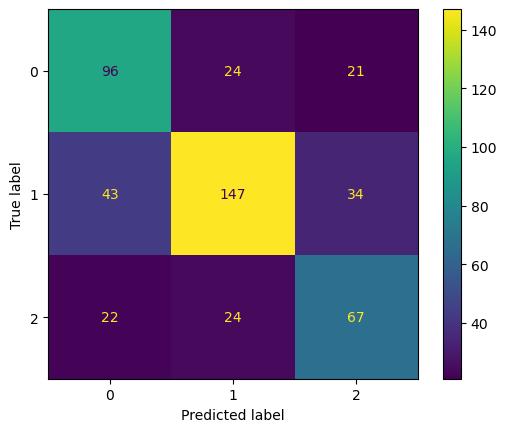

In [256]:
disp = ConfusionMatrixDisplay(conf_matrix1)
disp.plot()
plt.show()

## Implementation 2 - Using Gaussian Naive Bayes classifier

In [257]:
# Initialize the Gaussian Naive Bayes classifier
clf2 = GaussianNB()

In [258]:
# Train the model on the training data
model2 = clf2.fit(X_train, y_train)

In [259]:
# Make predictions on the test data
pred_test2 = model2.predict(X_test)

In [260]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test2, y_test)*100)

52.30125523012552

In [261]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test2, y_test, average='weighted')*100)

54.95041240347921

In [262]:
# Calculate and display the weighted F1 score
display(recall_score(pred_test2, y_test, average='weighted')*100)

52.30125523012552

In [263]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(pred_test2, y_test, average='weighted')* 100,2))

51.83

In [264]:
report2 = classification_report(y_test, pred_test2)
print(f"Classification Report: \n{report2}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.46      0.56       161
           1       0.56      0.50      0.53       195
           2       0.40      0.64      0.49       122

    accuracy                           0.52       478
   macro avg       0.55      0.53      0.52       478
weighted avg       0.57      0.52      0.53       478



array([[74, 22,  9],
       [43, 98, 35],
       [44, 75, 78]])

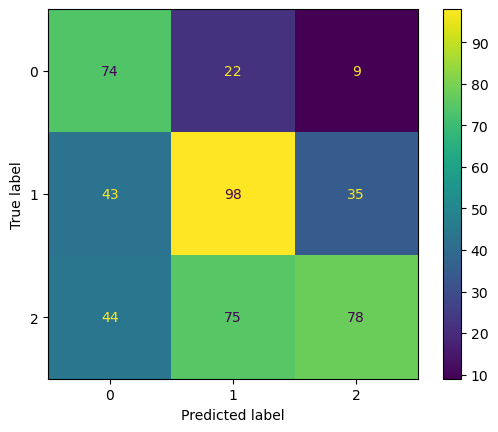

In [265]:
# Display the confusion matrix
conf_matrix2 = confusion_matrix(pred_test2, y_test)
display(conf_matrix2)

disp = ConfusionMatrixDisplay(conf_matrix2)
disp.plot()
plt.show()

## Implementation 3 - using Multinomial Naive Bayes Classifier

In [266]:
clf3 = MultinomialNB()

In [267]:
# Train the model on the training data
model3 = clf3.fit(X_train, y_train)

In [268]:
# Make predictions on the test data
pred_test3 = model3.predict(X_test)

In [269]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test3, y_test)*100)

65.69037656903765

In [270]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test3, y_test, average='weighted')*100)

67.35798996435946

In [271]:
# Calculate and display the weighted F1 score
display(recall_score(pred_test3, y_test, average='weighted')*100)

65.69037656903765

In [272]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(pred_test3, y_test, average='weighted')* 100,2))

65.87

In [273]:
report3 = classification_report(y_test, pred_test3)
print(f"Classification Report: \n{report3}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       161
           1       0.66      0.77      0.71       195
           2       0.56      0.62      0.59       122

    accuracy                           0.66       478
   macro avg       0.66      0.65      0.65       478
weighted avg       0.67      0.66      0.66       478



array([[ 88,  16,  12],
       [ 42, 150,  34],
       [ 31,  29,  76]])

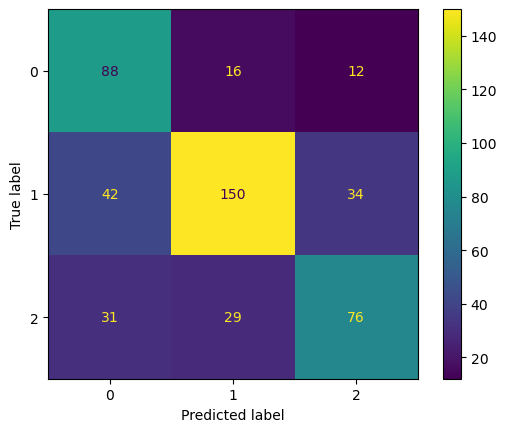

In [274]:
# Display the confusion matrix
conf_matrix3 = confusion_matrix(pred_test3, y_test)
display(conf_matrix3)

disp = ConfusionMatrixDisplay(conf_matrix3)
disp.plot()
plt.show()

## Implementation 4 - Using Random Forest Classifier

In [275]:
# Model Building
clf4 = RandomForestClassifier(n_estimators=100, random_state=42)

In [276]:
# Train the model on the training data
model4 = clf4.fit(X_train, y_train)

In [277]:
# Make predictions on the test data
pred_test4 = model4.predict(X_test)

In [278]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test4, y_test)*100)

61.92468619246861

In [279]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test4, y_test, average='weighted')*100)

63.81728514926355

In [280]:
# Calculate and display the weighted F1 score
display(recall_score(pred_test4, y_test, average='weighted')*100)

61.92468619246861

In [281]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(pred_test4, y_test, average='weighted')* 100,2))

62.29

In [282]:
report4 = classification_report(y_test, pred_test4)
print(f"Classification Report: \n{report4}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       161
           1       0.60      0.74      0.66       195
           2       0.61      0.52      0.56       122

    accuracy                           0.62       478
   macro avg       0.62      0.60      0.61       478
weighted avg       0.62      0.62      0.62       478



array([[ 89,  27,  19],
       [ 56, 144,  40],
       [ 16,  24,  63]])

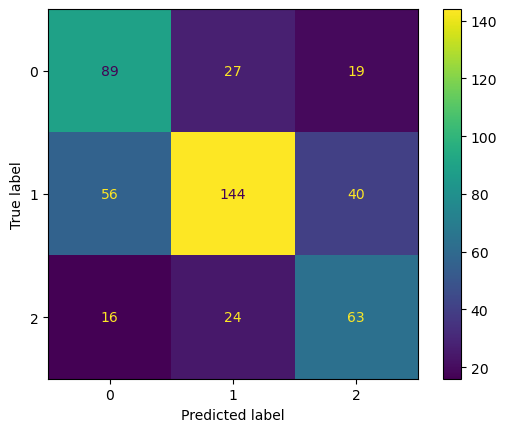

In [283]:
# Display the confusion matrix
conf_matrix4 = confusion_matrix(pred_test4, y_test)
display(conf_matrix4)

disp = ConfusionMatrixDisplay(conf_matrix4)
disp.plot()
plt.show()

In [284]:
model6=RandomForestClassifier(n_estimators=1000,min_samples_split = 5,min_samples_leaf = 1)

In [285]:
model6.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=1000)

In [286]:
# Make predictions on the test data
pred_test6 = model6.predict(X_test)

In [287]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test6, y_test)*100)

63.59832635983263

In [288]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test6, y_test, average='weighted')*100)

65.34635177268864

In [289]:
# Calculate and display the weighted F1 score
display(recall_score(pred_test6, y_test, average='weighted')*100)

63.59832635983263

In [290]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(pred_test6, y_test, average='weighted')* 100,2))

63.95

In [291]:
report6 = classification_report(y_test, pred_test6)
print(f"Classification Report: \n{report6}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.58      0.62       161
           1       0.62      0.75      0.68       195
           2       0.62      0.52      0.57       122

    accuracy                           0.64       478
   macro avg       0.64      0.62      0.62       478
weighted avg       0.64      0.64      0.63       478



array([[ 93,  26,  18],
       [ 50, 147,  40],
       [ 18,  22,  64]])

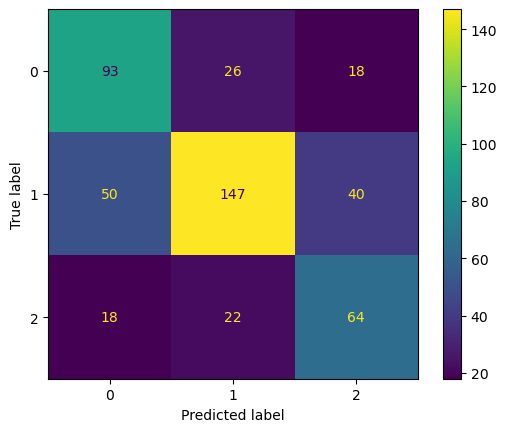

In [292]:
# Display the confusion matrix
conf_matrix6= confusion_matrix(pred_test6, y_test)
display(conf_matrix6)

disp = ConfusionMatrixDisplay(conf_matrix6)
disp.plot()
plt.show()

## Implementation 6 - Using Multinomial Naive Bayes Grid Search

In [293]:
params = {'alpha': [0.01,0.1,0.5,1,10],}

model7 = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
model7.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]}, verbose=5)

In [294]:
# Make predictions on the test data
pred_test7 = model7.predict(X_test)

In [295]:
print('Train Accuracy : %.3f'%model7.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%model7.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%model7.best_score_)
print('Best Parameters : ',model7.best_params_)

Train Accuracy : 0.852
Test Accuracy : 0.651
Best Accuracy Through Grid Search : 0.677
Best Parameters :  {'alpha': 0.5}


In [296]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test7, y_test)*100)

65.06276150627615

In [297]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test7, y_test, average='weighted')*100)

66.58942206358532

In [298]:
# Calculate and display the weighted F1 score
display(recall_score(pred_test7, y_test, average='weighted')*100)

65.06276150627615

In [299]:
# Calculate and display the weighted F1 score
display(round(metrics.f1_score(pred_test7, y_test, average='weighted')* 100,2))

65.19

In [300]:
report7 = classification_report(y_test, pred_test7)
print(f"Classification Report: \n{report7}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.54      0.63       161
           1       0.66      0.75      0.70       195
           2       0.55      0.64      0.59       122

    accuracy                           0.65       478
   macro avg       0.65      0.64      0.64       478
weighted avg       0.66      0.65      0.65       478



array([[ 87,  18,  11],
       [ 42, 146,  33],
       [ 32,  31,  78]])

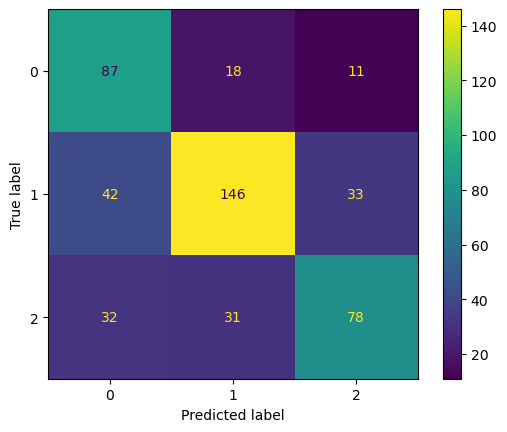

In [301]:
# Display the confusion matrix
conf_matrix7= confusion_matrix(pred_test7, y_test)
display(conf_matrix7)

disp = ConfusionMatrixDisplay(conf_matrix7)
disp.plot()
plt.show()

## Implementation 7 - Using Gradient Boosting Classifier

In [302]:
model8 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

In [303]:
model8.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [304]:
# Make predictions on the test data
pred_test8 = model8.predict(X_test)

In [305]:
# Calculate and display the weighted F1 score
display(accuracy_score(pred_test8, y_test)*100)

64.43514644351464

In [306]:
# Calculate and display the weighted F1 score
display(precision_score(pred_test8, y_test, average='weighted')*100)

66.23317959001804

In [307]:
display(recall_score(pred_test8, y_test, average='weighted')*100)

64.43514644351464

In [308]:
display(round(metrics.f1_score(pred_test8, y_test, average='weighted')* 100,2))

64.76

In [309]:
report8 = classification_report(y_test, pred_test8)
print(f"Classification Report: \n{report8}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.55      0.62       161
           1       0.63      0.76      0.69       195
           2       0.60      0.58      0.59       122

    accuracy                           0.64       478
   macro avg       0.65      0.63      0.63       478
weighted avg       0.65      0.64      0.64       478



array([[ 88,  21,  15],
       [ 50, 149,  36],
       [ 23,  25,  71]])

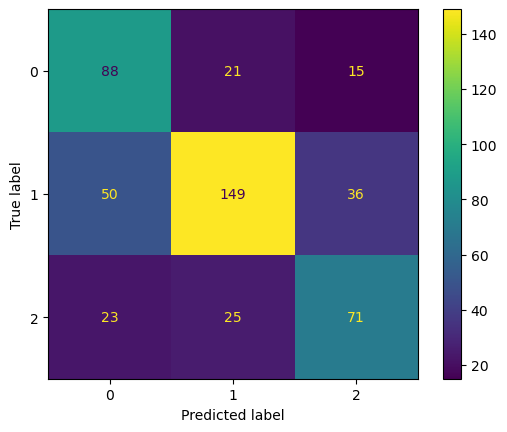

In [310]:
# Display the confusion matrix
conf_matrix8= confusion_matrix(pred_test8, y_test)
display(conf_matrix8)

disp = ConfusionMatrixDisplay(conf_matrix8)
disp.plot()
plt.show()

In [311]:
!pip install -U threadpoolctl

In [312]:
from imblearn.over_sampling import SMOTE

In [313]:
smote = SMOTE(random_state = 42, k_neighbors=2)
smote

SMOTE(k_neighbors=2, random_state=42)

In [314]:
X_resampling,y_resampling = smote.fit_resample(X,y)

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X_resampling, y_resampling, test_size = 0.3, random_state = 42)

In [316]:
# Initialize the Logistic Regression classifier
clf01 = LogisticRegression(max_iter=10000)

In [317]:
# Train the model on the training data
model01 = clf01.fit(X_train, y_train)

In [318]:
# Make predictions on the test data
pred_test01 = model01.predict(X_test)

In [319]:
print('Accuracy is:', accuracy_score(pred_test01, y_test)*100)
print('Precision is:', precision_score(pred_test01, y_test, average='weighted')*100)
print('Recall is:', recall_score(pred_test01, y_test, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test01, y_test, average='weighted')* 100,2))

Accuracy is: 70.82018927444796
Precision is: 71.69184416930615
Recall is: 70.82018927444796
f1-score is: 70.74


In [320]:
report01 = classification_report(y_test, pred_test01)
print(f"Classification Report: \n{report1}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       161
           1       0.66      0.75      0.70       195
           2       0.59      0.55      0.57       122

    accuracy                           0.65       478
   macro avg       0.64      0.63      0.64       478
weighted avg       0.65      0.65      0.65       478



In [321]:
# Initialize the Gaussian Naive Bayes classifier
clf02 = GaussianNB()

In [322]:
# Train the model on the training data
model02 = clf02.fit(X_train, y_train)

In [323]:
# Make predictions on the test data
pred_test02 = model02.predict(X_test)

In [324]:
print('Accuracy is:', accuracy_score(pred_test02, y_test)*100)
print('Precision is:', precision_score(pred_test02, y_test, average='weighted')*100)
print('Recall is:', recall_score(pred_test02, y_test, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test02, y_test, average='weighted')* 100,2))

Accuracy is: 58.83280757097792
Precision is: 65.29913705625444
Recall is: 58.83280757097792
f1-score is: 59.61


In [325]:
report02 = classification_report(y_test, pred_test02)
print(f"Classification Report: \n{report02}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.42      0.53       211
           1       0.62      0.55      0.58       213
           2       0.52      0.80      0.63       210

    accuracy                           0.59       634
   macro avg       0.62      0.59      0.58       634
weighted avg       0.62      0.59      0.58       634



In [326]:
clf03 = MultinomialNB()

In [327]:
# Train the model on the training data
model03 = clf03.fit(X_train, y_train)

In [328]:
# Make predictions on the test data
pred_test03 = model03.predict(X_test)

In [329]:
print('Accuracy is:', accuracy_score(pred_test03, y_test)*100)
print('Precision is:', precision_score(pred_test03, y_test, average='weighted')*100)
print('Recall is:', recall_score(pred_test03, y_test, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test03, y_test, average='weighted')* 100,2))

Accuracy is: 66.08832807570978
Precision is: 68.7161286074273
Recall is: 66.08832807570978
f1-score is: 66.26


In [330]:
report03 = classification_report(y_test, pred_test03)
print(f"Classification Report: \n{report03}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.55      0.63       211
           1       0.70      0.65      0.67       213
           2       0.58      0.79      0.67       210

    accuracy                           0.66       634
   macro avg       0.68      0.66      0.66       634
weighted avg       0.68      0.66      0.66       634



In [331]:
# Model Building
clf04 = RandomForestClassifier(n_estimators=100, random_state=42)

In [332]:
# Train the model on the training data
model04 = clf04.fit(X_train, y_train)

In [333]:
# Make predictions on the test data
pred_test04 = model04.predict(X_test)

In [334]:
print('Accuracy is:', accuracy_score(pred_test04, y_test)*100)
print('Precision is:', precision_score(pred_test04, y_test, average='weighted')*100)
print('Recall is:', recall_score(pred_test04, y_test, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test04, y_test, average='weighted')* 100,2))

Accuracy is: 65.61514195583597
Precision is: 68.54141990299526
Recall is: 65.61514195583597
f1-score is: 65.76


In [335]:
report04 = classification_report(y_test, pred_test04)
print(f"Classification Report: \n{report04}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       211
           1       0.72      0.55      0.63       213
           2       0.57      0.80      0.67       210

    accuracy                           0.66       634
   macro avg       0.68      0.66      0.65       634
weighted avg       0.68      0.66      0.65       634



In [336]:
clf05=RandomForestClassifier(n_estimators=1000,min_samples_split = 5,min_samples_leaf = 1)

In [337]:
# Train the model on the training data
model05 = clf05.fit(X_train, y_train)

In [338]:
# Make predictions on the test data
pred_test05 = model05.predict(X_test)

In [339]:
print('Accuracy is:', accuracy_score(pred_test05, y_test)*100)
print('Precision is:', precision_score(pred_test05, y_test, average='weighted')*100)
print('Recall is:', recall_score(pred_test05, y_test, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test05, y_test, average='weighted')* 100,2))

Accuracy is: 67.03470031545741
Precision is: 69.57013057759598
Recall is: 67.03470031545741
f1-score is: 67.08


In [340]:
report05 = classification_report(y_test, pred_test05)
print(f"Classification Report: \n{report05}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.64      0.68       211
           1       0.75      0.58      0.65       213
           2       0.58      0.80      0.67       210

    accuracy                           0.67       634
   macro avg       0.69      0.67      0.67       634
weighted avg       0.69      0.67      0.67       634



In [341]:
params = {'alpha': [0.01,0.1,0.5,1,10],}

model07 = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
model07.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]}, verbose=5)

In [342]:
# Make predictions on the test data
pred_test07 = model07.predict(X_test)

In [343]:
print('Accuracy is:', accuracy_score(pred_test07, y_test)*100)
print('Precision is:', precision_score(pred_test07, y_test, average='weighted')*100)
print('Recall is:', recall_score(pred_test07, y_test, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test07, y_test, average='weighted')* 100,2))

Accuracy is: 66.08832807570978
Precision is: 68.42409654000973
Recall is: 66.08832807570978
f1-score is: 66.28


In [344]:
report07 = classification_report(y_test, pred_test07)
print(f"Classification Report: \n{report07}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.55      0.63       211
           1       0.70      0.65      0.67       213
           2       0.59      0.79      0.67       210

    accuracy                           0.66       634
   macro avg       0.68      0.66      0.66       634
weighted avg       0.68      0.66      0.66       634



In [345]:
print('Train Accuracy : %.3f'%model07.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%model07.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%model7.best_score_)
print('Best Parameters : ',model07.best_params_)

Train Accuracy : 0.802
Test Accuracy : 0.661
Best Accuracy Through Grid Search : 0.677
Best Parameters :  {'alpha': 0.5}


In [346]:
clf08 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

In [347]:
# Train the model on the training data
model08 = clf08.fit(X_train, y_train)

In [348]:
# Make predictions on the test data
pred_test08 = model08.predict(X_test)

In [349]:
print('Accuracy is:', accuracy_score(pred_test08, y_test)*100)
print('Precision is:', precision_score(pred_test08, y_test, average='weighted')*100)
print('Recall is:', recall_score(pred_test08, y_test, average='weighted')*100)
print('f1-score is:', round(metrics.f1_score(pred_test08, y_test, average='weighted')* 100,2))

Accuracy is: 65.77287066246058
Precision is: 67.74926859686484
Recall is: 65.77287066246058
f1-score is: 65.67


In [350]:
report08 = classification_report(y_test, pred_test08)
print(f"Classification Report: \n{report08}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       211
           1       0.75      0.61      0.67       213
           2       0.56      0.77      0.65       210

    accuracy                           0.66       634
   macro avg       0.68      0.66      0.66       634
weighted avg       0.68      0.66      0.66       634



In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.DataFrame([
    ['Logistic Regression', 64.85, 65.89, 64.85, 65.12],
    ['Gaussian Naive Bayes', 52.30, 54.95, 52.30, 51.83],
    ['Multinomial Naive Bayes', 65.69, 67.35, 65.69, 65.87],
    ['Random Forest', 64.43, 65.99, 64.43, 64.76],
    ['Multinomial Naive Bayes GridSearch', 65.10, 66.58, 65.06, 65.19],
    ['Gradient Boost Classifier', 64.22, 65.93, 64.22, 64.54]
                   ],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1-Score']
)

print("Performance metrics for Intensity Analysis before SMOTE sampling(%)")
print(df1)

Performance metrics for Intensity Analysis before SMOTE sampling(%)
                                Model  Accuracy  Precision  Recall  f1-Score
0                 Logistic Regression     64.85      65.89   64.85     65.12
1                Gaussian Naive Bayes     52.30      54.95   52.30     51.83
2             Multinomial Naive Bayes     65.69      67.35   65.69     65.87
3                       Random Forest     64.43      65.99   64.43     64.76
4  Multinomial Naive Bayes GridSearch     65.10      66.58   65.06     65.19
5           Gradient Boost Classifier     64.22      65.93   64.22     64.54


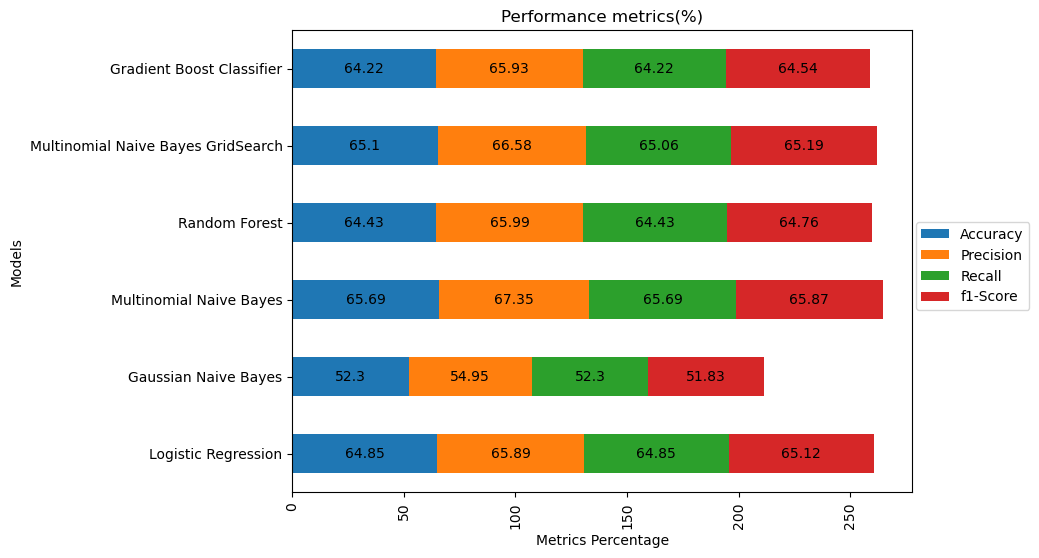

In [352]:
# plot data in stack manner of bar type
b = df1.plot(x='Model', kind='barh', stacked=True,figsize = (8,6), xlabel='Metrics Percentage', ylabel = 'Models',
        title='Performance metrics(%)')

for c in b.containers:
  #labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
  b.bar_label(c,  label_type = 'center')
plt.legend(loc='upper right', bbox_to_anchor=(0.6, 0., 0.6, 0.6))
plt.xticks(rotation=90)

plt.show()

In [353]:
df2 = pd.DataFrame([
    ['Logistic Regression', 71, 71.69, 70.82, 70.74],
    ['Gaussian Naive Bayes', 58.83, 65.29, 58.83, 59.61],
    ['Multinomial Naive Bayes', 66.08, 68.71, 66.08, 66.26],
    ['Random Forest', 65.61, 68.54, 65.61, 65.76],
    ['Multinomial Naive Bayes GridSearch', 66.08, 68.42, 66.08, 66.28],
    ['Gradient Boost Classifier', 65.93, 67.72, 65.93, 65.89]
                   ],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'f1-Score']
)

print("Performance metrics for Intensity Analysis after SMOTE sampling(%)")
print(df2)

Performance metrics for Intensity Analysis after SMOTE sampling(%)
                                Model  Accuracy  Precision  Recall  f1-Score
0                 Logistic Regression     71.00      71.69   70.82     70.74
1                Gaussian Naive Bayes     58.83      65.29   58.83     59.61
2             Multinomial Naive Bayes     66.08      68.71   66.08     66.26
3                       Random Forest     65.61      68.54   65.61     65.76
4  Multinomial Naive Bayes GridSearch     66.08      68.42   66.08     66.28
5           Gradient Boost Classifier     65.93      67.72   65.93     65.89


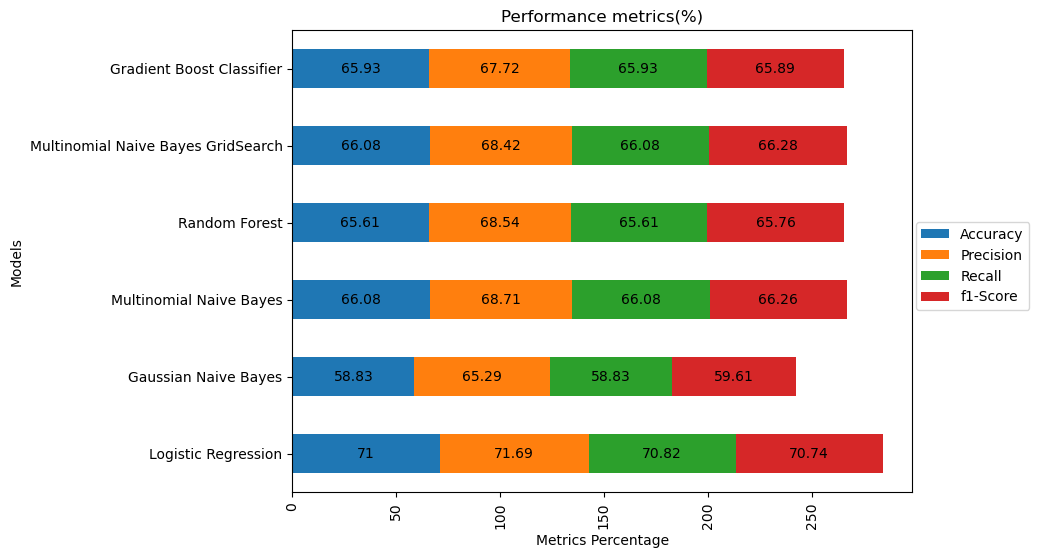

In [354]:
# plot data in stack manner of bar type
b = df2.plot(x='Model', kind='barh', stacked=True,figsize = (8,6), xlabel='Metrics Percentage', ylabel = 'Models',
        title='Performance metrics(%)')

for c in b.containers:
  #labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
  b.bar_label(c,  label_type = 'center')
plt.legend(loc='upper right', bbox_to_anchor=(0.6, 0., 0.6, 0.6))
plt.xticks(rotation=90)

plt.show()

In [355]:
import pickle

file_name = "LogisticRegression.pickle"
pickle.dump(clf01, open(file_name, "wb"))

[CV 2/5] END ........................alpha=0.01;, score=0.601 total time=   0.1s
[CV 2/5] END .........................alpha=0.1;, score=0.605 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;, score=0.610 total time=   0.0s
[CV 1/5] END ...........................alpha=1;, score=0.646 total time=   0.0s
[CV 1/5] END ..........................alpha=10;, score=0.641 total time=   0.0s
[CV 4/5] END ..........................alpha=10;, score=0.623 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.649 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.628 total time=   0.0s
[CV 3/5] END .........................alpha=0.5;, score=0.672 total time=   0.0s
[CV 4/5] END .........................alpha=0.5;, score=0.637 total time=   0.0s
[CV 1/5] END ..........................alpha=10;, score=0.750 total time=   0.0s
[CV 2/5] END ..........................alpha=10;, score=0.622 total time=   0.0s
[CV 4/5] END ...............